In [1]:
import zipfile

# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-10 17:58:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.203.208, 216.58.215.80, 142.250.186.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.203.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495,13M  19,0MB/s    in 24s     

2022-05-10 17:59:07 (20,9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [6]:
# baseline 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

2022-05-10 18:02:36.138204: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 278s 1s/step - loss: 2.1762 - accuracy: 0.2009 - val_loss: 2.0206 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 304s 1s/step - loss: 1.8925 - accuracy: 0.3467 - val_loss: 1.9509 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 255s 1s/step - loss: 1.5384 - accuracy: 0.4795 - val_loss: 1.9791 - val_accuracy: 0.3436
Epoch 4/5
235/235 [==============================] - 226s 961ms/step - loss: 0.9636 - accuracy: 0.6835 - val_loss: 2.3564 - val_accuracy: 0.3084
Epoch 5/5
235/235 [==============================] - 254s 1s/step - loss: 0.4095 - accuracy: 0.8749 - val_loss: 3.4879 - val_accuracy: 0.2860


In [8]:
model_9.evaluate(test_data)

79/79 [==============================] - 25s 317ms/step - loss: 3.4879 - accuracy: 0.2860


[3.4879398345947266, 0.28600001335144043]

In [9]:
# overfitting.. try to simplify model
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 504ms/step - loss: 2.1345 - accuracy: 0.2419 - val_loss: 1.9601 - val_accuracy: 0.3140
Epoch 2/5
235/235 [==============================] - 122s 518ms/step - loss: 1.8078 - accuracy: 0.3841 - val_loss: 1.8900 - val_accuracy: 0.3248
Epoch 3/5
235/235 [==============================] - 118s 501ms/step - loss: 1.5506 - accuracy: 0.4841 - val_loss: 1.9523 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 118s 501ms/step - loss: 1.2054 - accuracy: 0.6112 - val_loss: 2.0687 - val_accuracy: 0.3292
Epoch 5/5
235/235 [==============================] - 117s 498ms/step - loss: 0.7933 - accuracy: 0.7560 - val_loss: 2.3878 - val_accuracy: 0.3028


In [10]:
# try data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [22]:
import matplotlib.pyplot as plt

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

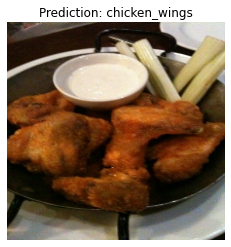

In [23]:
pred_and_plot(model_11, "10_food_classes_all_data/test/chicken_wings/22089.jpg", class_names)

In [24]:
model_11.save("saved_trained_model")

2022-05-11 00:35:53.306934: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_trained_model/assets


In [25]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 17s 206ms/step - loss: 1.8576 - accuracy: 0.3604


[1.8575507402420044, 0.36039999127388]